<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/unsupervised/02_dimensionality_reduction/05_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import bibliotek

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

###Wygenerowanie danych

In [4]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 2s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


###Wizualizacja danych

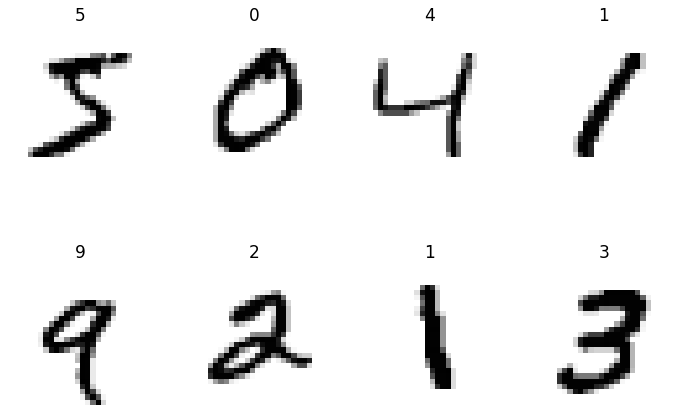

In [7]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='black', fontsize=17)
    plt.axis('off')
plt.show()

In [8]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

###Standaryzacja

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

###PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape


(10000, 3)

Wyjaśniona wariancja

In [17]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

explained_variance_ratio  cumulative  component
0                  0.061640    0.061640          1
1                  0.043662    0.105302          2
2                  0.040458    0.145760          3

In [18]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [19]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

pca_1      pca_2     pca_3 class
0 -0.997695  -4.651622 -0.739625   5.0
1  8.682767  -7.123953 -4.195380   0.0
2  2.439027  10.566762 -4.056962   4.0
3 -7.291476  -3.685944  3.064705   1.0
4 -4.791504   4.498223 -5.603119   9.0

In [20]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950, 
           title='PCA - 2 components', template='plotly_dark')

In [21]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              opacity=0.5, width=950, height=700, title='PCA - 3 components', template='plotly_dark')

###t-SNE

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.555s...
[t-SNE] Computed neighbors for 10000 samples in 181.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.161201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.317520
[t-SNE] KL divergence after 1000 iterations: 1.699727


In [25]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2 class
0     19.611757 -52.451088   5.0
1    -43.982738 -57.513039   0.0
2    -13.828005  79.266434   4.0
3     41.994984   5.699718   1.0
4     22.642902  70.974106   9.0
...         ...        ...   ...
9995  36.345753 -48.891571   5.0
9996   6.754209 -17.484552   8.0
9997 -57.434494  23.220127   6.0
9998  13.644258  52.373737   9.0
9999  64.859367  39.670357   7.0

[10000 rows x 3 columns]

Wizualizacja t-SNE

In [27]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components') 

###Porównanie PCA vs. t-SNE

In [42]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.03, subplot_titles=['PCA', 't-SNE'])

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)


for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(template='plotly_dark', showlegend=False, width=950)
fig.show()

###50 komponentów

In [43]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [44]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)
X_train_tsne_50.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.059s...
[t-SNE] Computed neighbors for 10000 samples in 10.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.767398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.271835
[t-SNE] KL divergence after 1000 iterations: 1.650435


(10000, 2)

In [45]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

tsne_1     tsne_2 class
0     20.486578 -41.438530   5.0
1     74.730713  21.143618   0.0
2     14.781996  62.231724   4.0
3    -79.703972 -15.812056   1.0
4    -23.541050  52.552586   9.0
...         ...        ...   ...
9995   6.572582 -58.948025   5.0
9996  -9.096842 -12.057337   8.0
9997  45.582714 -53.730759   6.0
9998 -24.551826  47.466019   9.0
9999 -62.281570  21.230976   7.0

[10000 rows x 3 columns]

In [46]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 components after PCA')

In [47]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0, 10):
    fig.add_trace(fig1['data'][i], row=1, col=1)
    fig.add_trace(fig2['data'][i], row=1, col=2)
    fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()

3 komponenty

In [48]:

tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.059s...
[t-SNE] Computed neighbors for 10000 samples in 11.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.767398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.447136
[t-SNE] KL divergence after 1000 iterations: 1.451760


In [50]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

tsne_1     tsne_2     tsne_3 class
0     11.128159  -6.750823   4.491791   5.0
1      8.997501   1.650489 -21.298134   0.0
2     -0.369859  17.326233  -0.985391   4.0
3      5.727454 -13.415332  11.673531   1.0
4     -8.794388  10.313441   9.697758   9.0
...         ...        ...        ...   ...
9995   0.273085  -9.804887 -11.544967   5.0
9996  -3.796922   1.068687  -1.564683   8.0
9997 -14.206968  -4.428989 -12.717836   6.0
9998  -7.897072   7.599140   8.563062   9.0
9999   0.643256   0.681403  20.095907   7.0

[10000 rows x 4 columns]

In [51]:
px.scatter_3d(X_train_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 3 components')